In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
dataset_path = 'Kaggle/datasets/olist/'
df_orders = pd.read_csv(dataset_path + 'olist_orders_dataset.csv')
df_items = pd.read_csv(dataset_path + 'olist_order_items_dataset.csv')
df_payments = pd.read_csv(dataset_path + 'olist_order_payments_dataset.csv')
df_products = pd.read_csv(dataset_path + 'olist_products_dataset.csv')
df_reviews = pd.read_csv(dataset_path + 'olist_order_reviews_dataset.csv')
df_customers = pd.read_csv(dataset_path + 'olist_customers_dataset.csv')
df_ctg_translate = pd.read_csv(dataset_path + 'product_category_name_translation.csv')

In [3]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
order_date_cols = df_orders.columns[3:]

for col in order_date_cols:
    df_orders[col] = pd.to_datetime(df_orders[col])

df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [6]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [8]:
review_date_cols = df_reviews.columns[5:]

for col in review_date_cols:
    df_reviews[col] = pd.to_datetime(df_reviews[col])

df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [9]:
from IPython.display import Image
from IPython.core.display import HTML

Image(url="https://i.imgur.com/HRhd2Y0.pngZ", width=1000)

In [10]:
orders_used_cols = ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_delivered_customer_date']
customers_used_cols = ['customer_id', 'customer_unique_id']

df_reviews_customers = pd.merge(
    left=df_reviews,
    right=df_orders[orders_used_cols],
    on='order_id',
    how='left'
)

df_reviews_customers = pd.merge(
    left=df_reviews_customers,
    right=df_customers[customers_used_cols],
    on='customer_id',
    how='left'
)

df_reviews_customers.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-17 18:42:41,68a5590b9926689be4e10f4ae2db21a8
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-03-09 23:17:20,64190b91b656ab8f37eb89b93dc84584
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-16 17:28:48,1d47144362c14e94ccdd213e8ec277d5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-20 09:08:35,c8cf6cb6b838dc7a33ed199b825e8616
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-28 16:33:35,d16000272660a1fef81482ad75ba572a


In [303]:
df_reviews_customers[['review_id', 'order_id', 'customer_unique_id', 'review_score', 'review_answer_timestamp']].head().reset_index(drop=True)

,review_id,order_id,customer_unique_id,review_score,review_answer_timestamp
0,13359f48c3c7e41a2b8afca340937eeb,e22acc9c116caa3f2b7121bbb380d08e,0000366f3b9a7992bf8c76cfdf3221e2,5,2018-05-21 13:44:48
1,e383e10e36a765f04f752a37c1674e43,3594e05a005ac4d06a72673270ef9ec9,0000b849f77a49e4a4ce2b2a4ca5be3f,4,2018-05-11 22:29:25
2,d89cb4217c23008b141e66c3160de8a4,b33ec3b699337181488304f362a6b734,0000f46a3911fa3c0805444483337064,3,2017-04-07 01:19:44
3,6f22e4ad2cd9e0d40c5842e4787b4321,41272756ecddd9a9ed0180413cc22fb6,0000f6ccb0745a6a4b88665a16c9f078,4,2017-11-03 00:17:51
4,880a77e7dd4e496969f138f974cc44a1,d957021f1127559cd947b62533f484f7,0004aac84e0df4da2b147fca70cf8255,5,2017-12-02 22:29:35


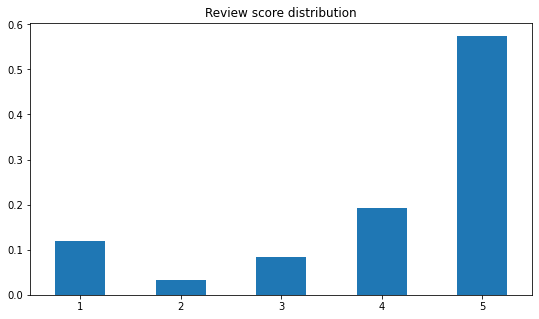

In [306]:
plt.figure(figsize=(9,5))
df_reviews_customers['review_score'].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title('Review score distribution')
plt.xticks(rotation=0);

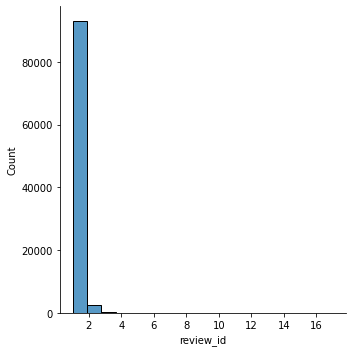

In [12]:
sns.displot(df_reviews_customers.groupby('customer_unique_id')['review_id'].count())

<AxesSubplot:>

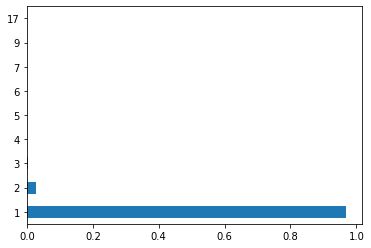

In [13]:
df_reviews_customers.groupby('customer_unique_id')['review_id'].count().value_counts(normalize=True).sort_index().plot(kind='barh')

In [14]:
df_reviews_customers.groupby('customer_unique_id')['review_id'].count().sort_values()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2     1
a91913d94fec6055b4b00fff604deb12     1
a918cb24d1e85182ffa5200ea39efbef     1
a91813199cdc5b15d7b5267ddef9e543     1
a9180fef5856f2ea4dc394f4470ec591     1
                                    ..
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
3e43e6105506432c953e165fb2acf44c     9
8d50f5eadf50201ccdcedfb9e2ac8455    17
Name: review_id, Length: 96096, dtype: int64

In [15]:
df_reviews_customers[df_reviews_customers['customer_unique_id'] == '8d50f5eadf50201ccdcedfb9e2ac8455'].sort_values(by='review_creation_date')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id
12657,a58d637619788f616ab837c119ca5b2c,5d848f3d93a493c1c8955e018240e7ca,5,NaN,NaN,2017-05-28,2017-05-29 00:05:02,0e4fdc084a6b9329ed55d62dcd653ccf,shipped,2017-05-15 23:30:03,NaT,8d50f5eadf50201ccdcedfb9e2ac8455
44970,7ecc7adba17766dab9097a0116a75a66,369634708db140c5d2c4e365882c443a,5,NaN,NaN,2017-06-25,2017-06-26 20:53:55,b2b13de0770e06de50080fea77c459e6,delivered,2017-06-18 22:56:48,2017-06-23 12:55:50,8d50f5eadf50201ccdcedfb9e2ac8455
85795,cb44e7ba6bacbf6f348aec2b9ab56790,4f62d593acae92cea3c5662c76122478,5,NaN,NaN,2017-07-22,2017-07-24 12:52:56,dfb941d6f7b02f57a44c3b7c3fefb44b,delivered,2017-07-18 23:10:58,2017-07-21 16:19:40,8d50f5eadf50201ccdcedfb9e2ac8455
21657,8858e37108a15029eef04f510161fb8a,bf92c69b7cc70f7fc2c37de43e366173,5,NaN,NaN,2017-08-01,2017-08-02 01:22:24,42dbc1ad9d560637c9c4c1533746f86d,delivered,2017-07-24 22:11:50,2017-07-31 16:59:58,8d50f5eadf50201ccdcedfb9e2ac8455
3079,c40b5c0ee4779d9f1c25da03503943e1,519203404f6116d406a970763ee75799,5,NaN,NaN,2017-08-10,2017-08-11 03:39:10,1c62b48fb34ee043310dcb233caabd2e,delivered,2017-08-05 08:59:43,2017-08-09 15:22:28,8d50f5eadf50201ccdcedfb9e2ac8455
33360,fe4defbc0ab6116a1e5a93741fde4b1d,5837a2c844decae8a778657425f6d664,1,NaN,NaN,2017-08-19,2017-08-19 13:34:35,31dd055624c66f291578297a551a6cdf,unavailable,2017-07-17 22:11:13,NaT,8d50f5eadf50201ccdcedfb9e2ac8455
3323,fa2449a730e7e4a66f698977f6ab3802,e3071b7624445af6e4f3a1b23718667d,5,NaN,NaN,2017-09-12,2017-09-13 01:39:44,0bf8bf19944a7f8b40ba86fef778ca7c,delivered,2017-09-05 22:14:52,2017-09-11 13:27:49,8d50f5eadf50201ccdcedfb9e2ac8455
39950,2f195bb1c592abb49ca9930b8b6b22f9,cd4b336a02aacabd0ef22f6db711f95e,5,NaN,NaN,2017-10-24,2017-10-24 16:55:12,89be66634d68fa73a95499b6352e085d,delivered,2017-10-18 23:25:04,2017-10-23 18:33:01,8d50f5eadf50201ccdcedfb9e2ac8455
35034,ceea1f7a0d8f9c6d139da6813f09344f,89d9b111d2b990deb5f5f9769f92800b,5,NaN,NaN,2017-11-01,2017-11-02 01:42:01,9a1afef458843a022e431f4cb304dfe9,delivered,2017-10-29 16:58:02,2017-10-31 15:33:47,8d50f5eadf50201ccdcedfb9e2ac8455
45953,68faf98deb4bc8c25eb42f07a1216f46,b850a16d8faf65a74c51287ef34379ce,5,NaN,NaN,2017-11-28,2017-11-28 21:59:16,1bd3585471932167ab72a84955ebefea,delivered,2017-11-22 20:01:53,2017-11-27 18:49:13,8d50f5eadf50201ccdcedfb9e2ac8455


In [16]:
df_ctg_translate.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [17]:
df_products = pd.merge(
    left=df_products,
    right=df_ctg_translate,
    how='left',
    on='product_category_name'
)

In [18]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [19]:
df_items = pd.merge(
    left=df_items,
    right=df_products[['product_id', 'product_category_name_english']],
    how='left',
    on='product_id'
)

df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools


In [20]:
df_reviews_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   review_id                      100000 non-null  object        
 1   order_id                       100000 non-null  object        
 2   review_score                   100000 non-null  int64         
 3   review_comment_title           11715 non-null   object        
 4   review_comment_message         41753 non-null   object        
 5   review_creation_date           100000 non-null  datetime64[ns]
 6   review_answer_timestamp        100000 non-null  datetime64[ns]
 7   customer_id                    100000 non-null  object        
 8   order_status                   100000 non-null  object        
 9   order_purchase_timestamp       100000 non-null  datetime64[ns]
 10  order_delivered_customer_date  97013 non-null   datetime64[ns]
 11  c

In [21]:
df_reviews_customers.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id
count,100000,100000,100000.000000,11715,41753,100000,100000,100000,100000,100000,97013,100000
unique,99173,99441,NaN,4600,36921,637,99010,99441,8,98875,95664,96096
top,4219a80ab469e3fc9901437b73da3f75,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05,b7770073b02ed1d626a027ce86a4ff82,delivered,2018-03-31 15:08:21,2017-10-19 19:18:47,8d50f5eadf50201ccdcedfb9e2ac8455
freq,3,3,NaN,426,230,466,4,3,97015,5,3,17
first,NaN,NaN,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28,NaN,NaN,2016-09-04 21:15:19,2016-10-11 13:46:32,NaN
last,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35,NaN,NaN,2018-10-17 17:30:18,2018-10-17 13:22:46,NaN
mean,NaN,NaN,4.070890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.359663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [331]:
df_reviews_customers['nth_review'] = df_reviews_customers.groupby('customer_unique_id')['review_answer_timestamp'].rank().apply(int)
df_reviews_customers = df_reviews_customers.sort_values(by=['customer_unique_id', 'nth_review'])
df_reviews_customers['prev_review_score'] = df_reviews_customers.groupby('customer_unique_id')['review_score'].shift(1)

In [332]:
df_reviews_customers[~df_reviews_customers['prev_review_score'].isna()].sort_values(by=['customer_unique_id', 'nth_review']).head(20)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,nth_review,prev_review_score
87334,24ad2fc85ec000ba4fbfd9841d9a1972,fd61441ba2a7b57e6342862e779b10b0,4,NaN,"Tem que retirar nos correios, muito incômodo",2017-10-14,2017-10-16 21:23:28,e36917a47d5bf39bd3f38bcafb3d438f,delivered,2017-09-29 14:46:58,2017-10-13 13:50:07,000bfa1d2f1a41876493be685390d6d3,2,5.0
56589,a05a89a9daa1ef53175c02ff565ce0b5,c306eca42d32507b970739b5b6a5a33a,4,Bom.,Recebi o produto. É de ótima qualidade. Só o c...,2018-08-08,2018-08-10 11:39:37,24b0e2bd287e47d54d193e7bbb51103f,canceled,2018-08-13 09:14:07,NaT,00172711b30d52eea8b313a7f2cced02,1,4.0
82678,776c5ccc5fe4508cfcec2555314f2288,08204559bebd39e09ee52dcb56d8faa2,5,NaN,"Maravilhoso,amei e chegou antes do prazo !",2018-01-20,2018-01-21 01:45:27,f6efe5d5c7b85e12355f9d5c3db46da2,delivered,2018-01-14 07:36:54,2018-01-19 22:14:14,004288347e5e88a27ded2bb23747066c,2,5.0
38278,cfdc19fc42ec4c201e0a7257a6df4bba,9392c5e72885ad5aba87e6223ca9838d,5,Tudo certo!,NaN,2018-06-20,2018-06-21 11:19:50,d95f60d70d9ea9a7fe37c53c931940bb,delivered,2018-05-26 19:42:48,2018-06-19 17:05:23,004b45ec5c64187465168251cd1c9c2f,2,1.0
53494,a68ed61c3df4e6277c6cecfc8d7fb46c,81a93b2fa39e104b865b2bc471c16008,5,NaN,Muito bom,2018-04-05,2018-04-06 11:55:56,8ac44e9c15d396b8c3c7cbab0fff4536,delivered,2018-03-22 18:09:41,2018-04-04 23:05:57,0058f300f57d7b93c477a131a59b36c3,2,1.0
77491,d18d89667712d5f44b85caf3320b46e1,cea3e6c11eb60acb9d8d4d51694832f8,4,NaN,NaN,2018-06-20,2018-06-22 19:38:50,cbb68c721ba9ddb30d8a490cc1897fa1,delivered,2018-06-03 10:12:57,2018-06-19 16:04:46,00a39521eb40f7012db50455bf083460,2,4.0
40465,dcecf8e3ba584a9ebe49439490a914bb,d61b915b69851aec8a8865f36cfd793e,5,NaN,entregue no prazo conbinado\r\n,2017-03-28,2017-03-29 00:42:16,102fc0966044243157bb81e4ee0a251e,delivered,2017-03-21 19:25:23,2017-03-28 14:54:11,00cc12a6d8b578b8ebd21ea4e2ae8b27,1,5.0
89384,59168ad031faf4d695bd0b532c8dc8c9,d61b915b69851aec8a8865f36cfd793e,3,NaN,NaN,2017-03-29,2017-04-01 00:59:52,102fc0966044243157bb81e4ee0a251e,delivered,2017-03-21 19:25:23,2017-03-28 14:54:11,00cc12a6d8b578b8ebd21ea4e2ae8b27,3,5.0
90758,59168ad031faf4d695bd0b532c8dc8c9,64307ceb91666760cf3ff463618302fd,3,NaN,NaN,2017-03-29,2017-04-01 00:59:52,c0a44bf37d5601228051fc07852f951f,delivered,2017-03-21 19:25:22,2017-03-27 11:30:19,00cc12a6d8b578b8ebd21ea4e2ae8b27,3,3.0
68087,5d19a78311a976f5b486279d3b91072f,ed0a6265b5b0a292cd537214f401f1fc,4,Produto entregue no prazo,NaN,2018-04-27,2018-04-29 20:54:58,71c7265705afd84d030d6adc3122d8dd,delivered,2018-04-18 21:58:08,2018-04-26 17:11:42,011575986092c30523ecb71ff10cb473,2,3.0


In [333]:
df_reviews_customers.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,nth_review,prev_review_score
32529,13359f48c3c7e41a2b8afca340937eeb,e22acc9c116caa3f2b7121bbb380d08e,5,Super Recomendo,"Adorei a cortina, ficou linda na minha sala, e...",2018-05-17,2018-05-21 13:44:48,fadbb3709178fc513abc1b2670aa1ad2,delivered,2018-05-10 10:56:27,2018-05-16 20:48:37,0000366f3b9a7992bf8c76cfdf3221e2,1,NaN
32338,e383e10e36a765f04f752a37c1674e43,3594e05a005ac4d06a72673270ef9ec9,4,NaN,NaN,2018-05-11,2018-05-11 22:29:25,4cb282e167ae9234755102258dd52ee8,delivered,2018-05-07 11:11:27,2018-05-10 18:02:42,0000b849f77a49e4a4ce2b2a4ca5be3f,1,NaN
36724,d89cb4217c23008b141e66c3160de8a4,b33ec3b699337181488304f362a6b734,3,NaN,NaN,2017-04-06,2017-04-07 01:19:44,9b3932a6253894a02c1df9d19004239f,delivered,2017-03-10 21:05:03,2017-04-05 14:38:47,0000f46a3911fa3c0805444483337064,1,NaN
33921,6f22e4ad2cd9e0d40c5842e4787b4321,41272756ecddd9a9ed0180413cc22fb6,4,NaN,Bom vendedor,2017-11-02,2017-11-03 00:17:51,914991f0c02ef0843c0e7010c819d642,delivered,2017-10-12 20:29:41,2017-11-01 21:23:05,0000f6ccb0745a6a4b88665a16c9f078,1,NaN
45983,880a77e7dd4e496969f138f974cc44a1,d957021f1127559cd947b62533f484f7,5,NaN,NaN,2017-11-28,2017-12-02 22:29:35,47227568b10f5f58a524a75507e6992c,delivered,2017-11-14 19:45:42,2017-11-27 23:08:56,0004aac84e0df4da2b147fca70cf8255,1,NaN


In [335]:
df_reviews_customers[['customer_unique_id', 'nth_review', 'review_score', 'prev_review_score']].query('prev_review_score > 0').reset_index(drop=True).head().to_markdown()

'|    | customer_unique_id               |   nth_review |   review_score |   prev_review_score |\n|---:|:---------------------------------|-------------:|---------------:|--------------------:|\n|  0 | 000bfa1d2f1a41876493be685390d6d3 |            2 |              4 |                   5 |\n|  1 | 00172711b30d52eea8b313a7f2cced02 |            1 |              4 |                   4 |\n|  2 | 004288347e5e88a27ded2bb23747066c |            2 |              5 |                   5 |\n|  3 | 004b45ec5c64187465168251cd1c9c2f |            2 |              5 |                   1 |\n|  4 | 0058f300f57d7b93c477a131a59b36c3 |            2 |              5 |                   1 |'

## Transition Table

Assumptions:
- Markov property: history beyond the previous state doesn't matter
- Only reviewed purchases are included
- Ordered by review submission time

The probability of a customer gives a t+1-star rating for his/her (t+1)-th purchase given he/she has given i-star rating for his/her (t)th purchase is defined as 

$$ P(X_{t+1} = i_{t+1} | X_t = i_t) = P(X_{t+1} = i_{t+1} | X_0 = i_0, X_1 = i_1, ..., X_t = i_t)  $$

The left hand can be obtained from

$$ P(X_{t+1} = i_{t+1} | X_t = i_t) = \frac{P(X_{t+1} = i_{t+1} \cap X_t = i_t)}{P(X_t = i_t)} $$

In [293]:
# df_reviews_customers['prev_review_score'] = df_reviews_customers['prev_review_score'].apply(lambda x: int(x) if not np.isnan(x) else x)

df_score_transition = pd.DataFrame(df_reviews_customers.groupby('prev_review_score')['review_score'].value_counts(normalize=True)).rename(columns={'review_score': 'p'}).reset_index()
df_score_transition['prev_review_score'] = df_score_transition['prev_review_score'].apply(int)
df_score_transition

,prev_review_score,review_score,p
0,1,1,0.550691
1,1,5,0.246544
2,1,4,0.089862
3,1,3,0.082949
4,1,2,0.029954
5,2,2,0.396694
6,2,5,0.247934
7,2,4,0.132231
8,2,3,0.123967
9,2,1,0.099174


Example: 
- the probability of someone gives 1-star rating given he have 1-star rating on his previous purchase is 55%.
- the probability of someone gives 4-star rating given he have 3-star rating on his previous purchase is 20.1%.

## Transition Matrix

In [294]:
transition_matrix = pd.pivot_table(df_score_transition, index='prev_review_score', columns='review_score', values='p')

In [339]:
transition_matrix.apply(lambda x: round(x, 3))

review_score,1,2,3,4,5
prev_review_score,,,,,
1,0.551,0.030,0.083,0.090,0.247
2,0.099,0.397,0.124,0.132,0.248
3,0.095,0.030,0.409,0.201,0.265
4,0.084,0.017,0.094,0.507,0.298
5,0.061,0.016,0.033,0.073,0.817


In [237]:
transition_matrix_2_step = np.matmul(transition_matrix, transition_matrix)

In [239]:
transition_matrix_2_step.sum(axis=1)

array([1., 1., 1., 1., 1.])

In [244]:
transition_matrix_2_step

array([[0.33653347, 0.03648828, 0.09988115, 0.1336422 , 0.39345489],
       [0.13177471, 0.17045632, 0.12868046, 0.17137834, 0.39771017],
       [0.12662318, 0.035201  , 0.20621494, 0.21600273, 0.41595815],
       [0.11739114, 0.02592933, 0.10504279, 0.3070729 , 0.44456384],
       [0.09364089, 0.02388414, 0.05441078, 0.11082178, 0.71724241]])

In [259]:
transition_matrix

array([[0.55069124, 0.02995392, 0.08294931, 0.08986175, 0.24654378],
       [0.09917355, 0.39669421, 0.12396694, 0.1322314 , 0.24793388],
       [0.0945122 , 0.0304878 , 0.40853659, 0.20121951, 0.2652439 ],
       [0.08393632, 0.01736614, 0.09406657, 0.5065123 , 0.29811867],
       [0.06051502, 0.01630901, 0.03304721, 0.07296137, 0.81716738]])

In [343]:
import networkx as nx

G = nx.MultiDiGraph()

nodes = df_score_transition['review_score'].unique().astype(str).tolist()
node_with_edges = [] # list of tuples
edge_labels = {}

for row in df_score_transition.sort_values(by=['prev_review_score', 'review_score']).iterrows():
    node_from = str(int(row[1]['prev_review_score']))
    node_to = str(int(row[1]['review_score']))
    weight = round(row[1]['p'], 3)
    node_with_edges.append((node_from, node_to, weight))
    edge_labels[(node_from, node_to)] = weight

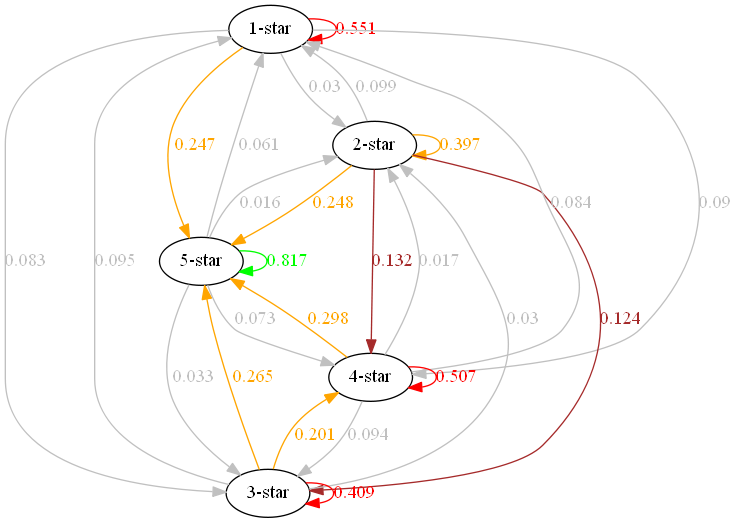

In [344]:
from graphviz import Digraph

g = Digraph('rating-markov', filename='rating-markov', format='png')

for node in sorted(nodes):
    g.node(node, '{}-star'.format(node))
    
for edge in node_with_edges:
    node_from = edge[0]
    node_to = edge[1]
    weight = edge[2]
    
    if weight <= 0.1:
        color = 'grey'
    elif weight <= 0.2:
        color = 'brown'
    elif weight <= 0.4:
        color = 'orange'
    elif weight <= 0.6:
        color = 'red'
    else:
        color = 'green'
        
    g.edge(node_from, node_to, label=str(weight), color=color, fontcolor=color)
    
rendered = g.render()
Image(filename=rendered, width=600)

- Self-loops have at least 40% probability
- Customers who gave 5-star rating have 82% to give another 5-star
- Customers who gave 1-star rating have 55% to give another 1-star
- Customers have 25 - 30% chance to give 5-star rating given they gave 1/2/3/4-star rating

In [355]:
np.linalg.matrix_power(transition_matrix, 20)

array([[0.13375823, 0.03143804, 0.08332295, 0.15495288, 0.59652789],
       [0.13375772, 0.03143797, 0.08332267, 0.15495255, 0.59652909],
       [0.13375742, 0.03143792, 0.08332244, 0.15495223, 0.59652998],
       [0.13375713, 0.03143788, 0.08332222, 0.15495192, 0.59653085],
       [0.13375567, 0.03143765, 0.08332108, 0.15495026, 0.59653534]])

In [349]:
pd.DataFrame(np.linalg.matrix_power(transition_matrix, 20), index=[1,2,3,4,5], columns=[1,2,3,4,5]).apply(lambda x: round(x, 3)).to_markdown()

'|    |     1 |     2 |     3 |     4 |     5 |\n|---:|------:|------:|------:|------:|------:|\n|  1 | 0.134 | 0.031 | 0.083 | 0.155 | 0.597 |\n|  2 | 0.134 | 0.031 | 0.083 | 0.155 | 0.597 |\n|  3 | 0.134 | 0.031 | 0.083 | 0.155 | 0.597 |\n|  4 | 0.134 | 0.031 | 0.083 | 0.155 | 0.597 |\n|  5 | 0.134 | 0.031 | 0.083 | 0.155 | 0.597 |'

After a large number of purchases per customer, let's say 20, the probability of giving 5-star at the 20th purchase given he/she gave any rating at the 1st purchase is 59.6%. Just see how incoming edges to 5-star node have at least 25% weight. That says something about how customers tend to give 5-star after all.